<a href="https://colab.research.google.com/github/rhp34/Fetal-Health-Classification/blob/main/fetal_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/fetal_health-1.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
class_count = df.fetal_health.value_counts()
print('Class 1 Normal: ', class_count[1])
print('Class 2 Suspect: ', class_count[2])
print('Class 3 Pathological', class_count[3])

Class 1 Normal:  1655
Class 2 Suspect:  295
Class 3 Pathological 176


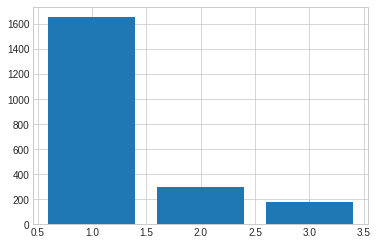

In [ ]:
imbal_data = df.fetal_health.values
y = LabelEncoder().fit_transform(imbal_data)
y = y +1
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()


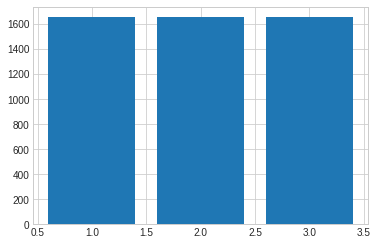

In [ ]:
#over sample
y = LabelEncoder().fit_transform(y)
y = y +1
oversample = SMOTE()
x_over, y_over = oversample.fit_resample(df, y)
counter = Counter(y_over)
plt.bar(counter.keys(), counter.values())
plt.show()


In [ ]:
correlations=df.corr()['fetal_health'].drop('fetal_health')
print(correlations)

baseline value                                            0.148151
accelerations                                            -0.364066
fetal_movement                                            0.088010
uterine_contractions                                     -0.204894
light_decelerations                                       0.058870
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_width                                          -0.068789
histogram_min                                             0.063175
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.02

In [ ]:
def getfeatures():
  max=correlations.abs()
  sorted_values = max.sort_values(ascending=False)
  return sorted_values[:10]


In [ ]:
#top features
features=getfeatures()
print(features)
featurelist=features.index.values.tolist()

prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
Name: fetal_health, dtype: float64


In [ ]:
from scipy.stats import stats
#if p-value<alpha there is signifigant evidence to conclude that there is a signifiant linear relationship between feature and fetal health
def hyptest(afeature,alpha):
  x=afeature
  yfeature=df.fetal_health
  slope,intercept,rvalue,pvalue,stderr=stats.linregress(x,yfeature)
  print("pval= ",pvalue)
  if pvalue<alpha:
    print("reject null hypothesis\n")
  else:
    print("accept null hypothesis\n")



In [ ]:
for i in featurelist:
  print("testing "+i+" @alpha=0.05")
  hyptest(df[i],0.05)
for i in featurelist:
  print("testing "+i+ " @alpha=0.1")
  hyptest(df[i],0.1)

testing prolongued_decelerations @alpha=0.05
pval=  8.854416080645558e-126
reject null hypothesis

testing abnormal_short_term_variability @alpha=0.05
pval=  5.9217105098267764e-118
reject null hypothesis

testing percentage_of_time_with_abnormal_long_term_variability @alpha=0.05
pval=  1.5027669343321993e-94
reject null hypothesis

testing accelerations @alpha=0.05
pval=  1.2435259928468496e-67
reject null hypothesis

testing histogram_mode @alpha=0.05
pval=  9.305867662121919e-32
reject null hypothesis

testing histogram_mean @alpha=0.05
pval=  3.030067468413348e-26
reject null hypothesis

testing mean_value_of_long_term_variability @alpha=0.05
pval=  3.3366704012009714e-26
reject null hypothesis

testing histogram_variance @alpha=0.05
pval=  6.218926688563014e-22
reject null hypothesis

testing histogram_median @alpha=0.05
pval=  1.2988891337532773e-21
reject null hypothesis

testing uterine_contractions @alpha=0.05
pval=  1.3846747025633525e-21
reject null hypothesis

testing prolo

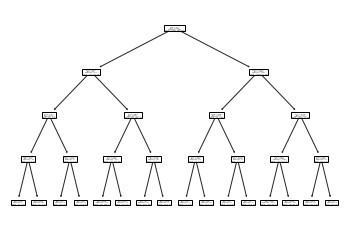

Accuracy:  0.9028213166144201


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
X = df[feature_cols]
Y = df.fetal_health

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
model_tree = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=0).fit(X_train, Y_train)
Y_pred = model_tree.predict(X_test)
tree.plot_tree(model_tree)
plt.show()
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))


In [ ]:
#Random Forest Model
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

feature_cols = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
X1 = df[feature_cols]
cnames = ['1', '2', '3']
Y1 = df.fetal_health
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=1)
model_ovr = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=4, random_state=42)
Y1_score = model_ovr.fit(X1_train, Y1_train)
Y1_pred = model_ovr.predict(X_test)
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=800)
#tree.plot_tree(model_ovr.estimators_[0], feature_names=feature_cols, class_names=cnames)
#fig.savefig('rftree.png')

print("Accuracy: ", model_ovr.score(X1_test, Y1_test))

Accuracy:  0.8871473354231975


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,Y_pred))
print('')
print(confusion_matrix(Y1_test, Y1_pred))


[[472  15   3]
 [ 39  57   0]
 [  3   2  47]]

[[480  10   0]
 [ 45  50   1]
 [  6  10  36]]


In [ ]:
print("decision tree:\n",classification_report(Y_test,Y_pred,digits=4))
print("random forest:\n",classification_report(Y1_test,Y1_pred,digits=4))

decision tree:
               precision    recall  f1-score   support

         1.0     0.9183    0.9633    0.9402       490
         2.0     0.7703    0.5938    0.6706        96
         3.0     0.9400    0.9038    0.9216        52

    accuracy                         0.9028       638
   macro avg     0.8762    0.8203    0.8441       638
weighted avg     0.8978    0.9028    0.8981       638

random forest:
               precision    recall  f1-score   support

         1.0     0.9040    0.9796    0.9403       490
         2.0     0.7143    0.5208    0.6024        96
         3.0     0.9730    0.6923    0.8090        52

    accuracy                         0.8871       638
   macro avg     0.8637    0.7309    0.7839       638
weighted avg     0.8810    0.8871    0.8787       638



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_recall_fscore_support as score


In [ ]:
#Decision Tree
area_under = roc_auc_score(Y, model_tree.predict_proba(X), multi_class='ovr')
print("Area under ROC curve for Decision Tree: ", area_under)
#Random Forest
area_under1 = roc_auc_score(Y1, model_ovr.predict_proba(X1), multi_class='ovr')
print("Area under ROC curve for Random Forest: ", area_under1)

Area under ROC curve for Decision Tree:  0.9207615821945723
Area under ROC curve for Random Forest:  0.9775903971657399


In [ ]:
#Decision Tree area under precision_recall_curve
Y_orig = df.fetal_health
Y = label_binarize(Y_orig, classes=[1,2,3])
n_classes = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model_tree1 = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=0).fit(X_train, Y_train)
Y_pred = model_tree1.predict(X_test)

Y_score = model_tree1.fit(X_train,Y_train)
Y_pred = model_tree1.score(X_test,Y_test)

precision, recall, f1_score, support = score(Y_test, model_tree1.predict(X_test))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))


precision: [0.94280079 0.85365854 0.94871795]
recall: [0.96370968 0.69306931 0.90243902]


In [ ]:
#Decision Tree area under precision_recall_curve
Y_prob = model_tree.predict_proba(X_test)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], Y_prob[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], Y_prob[:, i])


precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), Y_prob.ravel())
average_precision["micro"] = average_precision_score(Y_test, Y_prob, average="micro")

In [ ]:
#Decision Tree area under precision_recall_curve
area_under_prc = auc(recall["micro"], precision["micro"])
print(area_under_prc)

0.9507427392240861


In [ ]:
#Random Forest Classifier area under precision_recall_curve
feature_cols = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
X1 = df[feature_cols]
Y1_orig = df.fetal_health
Y1 = label_binarize(Y1_orig, classes=[1,2,3])
n_classes = 3
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
model_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, random_state=42))
Y1_score = model_ovr.fit(X1_train, Y1_train)
Y1_pred = model_ovr.score(X1_test, Y1_test)

precision, recall, f1_score, support = score(Y1_test, model_ovr.predict(X1_test))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [0.95481336 0.83908046 0.92682927]
recall: [0.97983871 0.72277228 0.92682927]


In [ ]:
Y1_prob = model_ovr.predict_proba(X1_test)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y1_test[:, i], Y1_prob[:, i])
    average_precision[i] = average_precision_score(Y1_test[:, i], Y1_prob[:, i])


precision["micro"], recall["micro"], _ = precision_recall_curve(Y1_test.ravel(), Y1_prob.ravel())
average_precision["micro"] = average_precision_score(Y1_test, Y1_prob, average="micro")

In [ ]:
area_under_prc = auc(recall["micro"], precision["micro"])
print(area_under_prc)

0.9875292601563821


In [ ]:
#k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
centers = kmeans.cluster_centers_

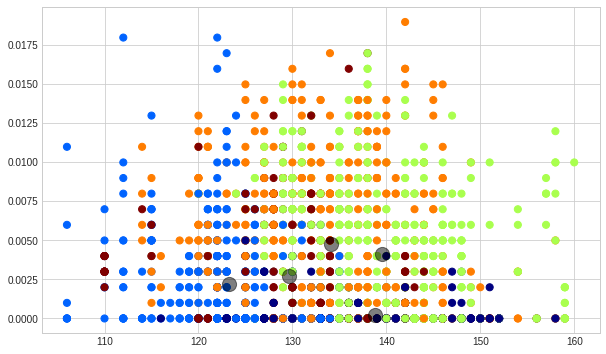

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 50,cmap = c_map , c = y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

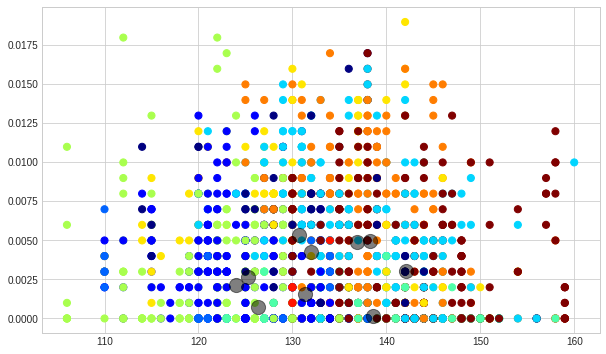

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 50,cmap = c_map , c = y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

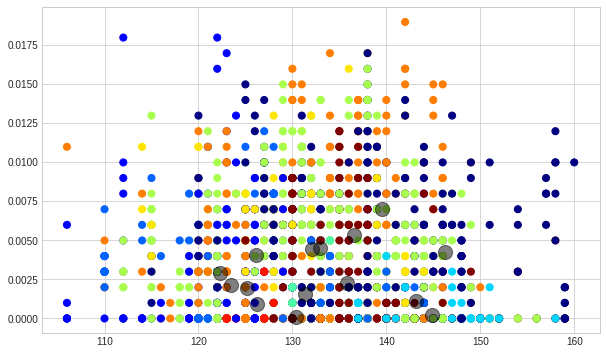

In [ ]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 50,cmap = c_map , c = y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()